In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter


# **1. Carregar dados da base**
Removendo dados irrelevantes da base

Carregamos tabela do kaggle e removemos colunas irrelevantes para o problema (*Patient_ID*).



In [ ]:
file_path = "global_cancer_patients_2015_2024.csv"
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "zahidmughal2343/global-cancer-patients-2015-2024", file_path)

df.drop(columns=['Patient_ID'], inplace=True)

/tmp/ipython-input-2-2915946342.py:2: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "zahidmughal2343/global-cancer-patients-2015-2024", file_path)


# **2. Análise do Dataset**

Neste tópico iremos:
- Verificar dimensões e tipos dos dados
- Caso exista duplicatas e/ou nulos


## **Exibimos as primeiras linhas do dataset**

In [ ]:
display(df.head())


,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


## **Verificamos se existem dados nulos e o tipo de cada dado**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    50000 non-null  int64  
 1   Gender                 50000 non-null  object 
 2   Country_Region         50000 non-null  object 
 3   Year                   50000 non-null  int64  
 4   Genetic_Risk           50000 non-null  float64
 5   Air_Pollution          50000 non-null  float64
 6   Alcohol_Use            50000 non-null  float64
 7   Smoking                50000 non-null  float64
 8   Obesity_Level          50000 non-null  float64
 9   Cancer_Type            50000 non-null  object 
 10  Cancer_Stage           50000 non-null  object 
 11  Treatment_Cost_USD     50000 non-null  float64
 12  Survival_Years         50000 non-null  float64
 13  Target_Severity_Score  50000 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 5.3+ 

## **Verrificando informações gerais dos dados do dataset (quantidade, média, valor minímo e etc)**

In [ ]:
display(df.describe())

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


In [ ]:
display(df.isnull().sum())


,0
Age,0
Gender,0
Country_Region,0
Year,0
Genetic_Risk,0
Air_Pollution,0
Alcohol_Use,0
Smoking,0
Obesity_Level,0
Cancer_Type,0


## **Checagem para garantir que não existem duplicatas**

In [ ]:
display(df.duplicated().sum())

np.int64(0)

## **Histograma para variáveis**

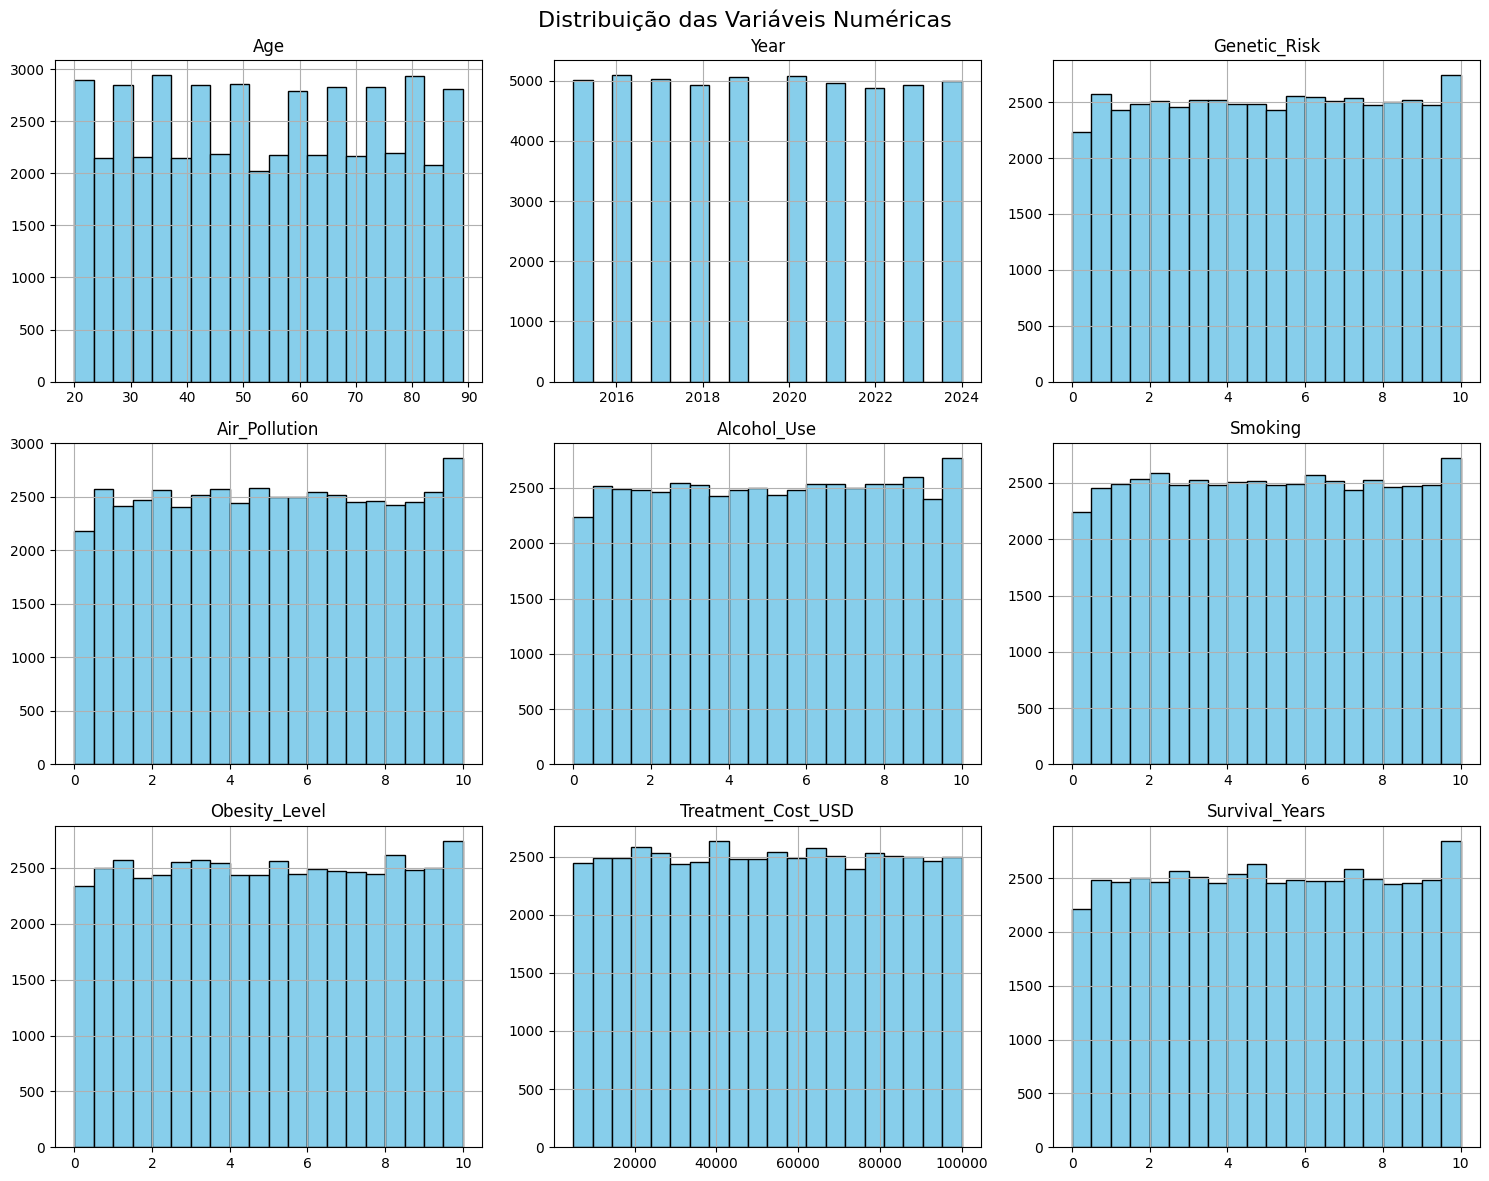

In [ ]:
numeric_features = [
    'Age', 'Year', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use',
    'Smoking', 'Obesity_Level', 'Treatment_Cost_USD', 'Survival_Years'
]

df[numeric_features].hist(bins=20, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle("Distribuição das Variáveis Numéricas", fontsize=16)
plt.tight_layout()
plt.show()


## **Relação das principais features numéricas com o target do dataset**

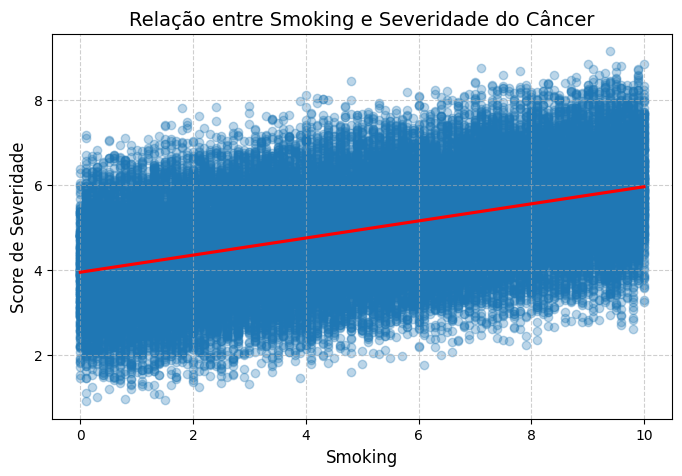

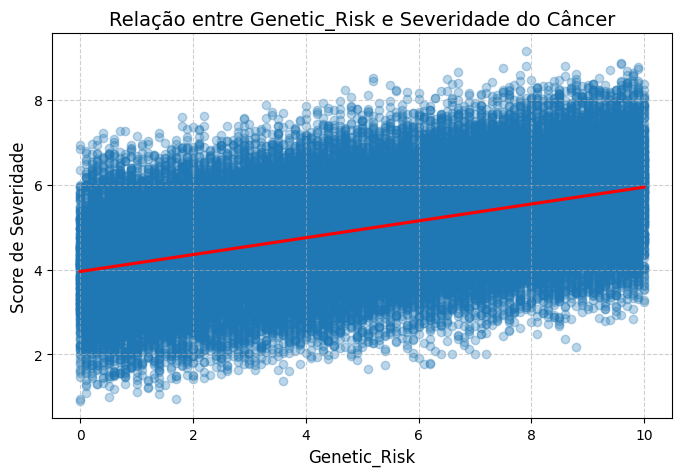

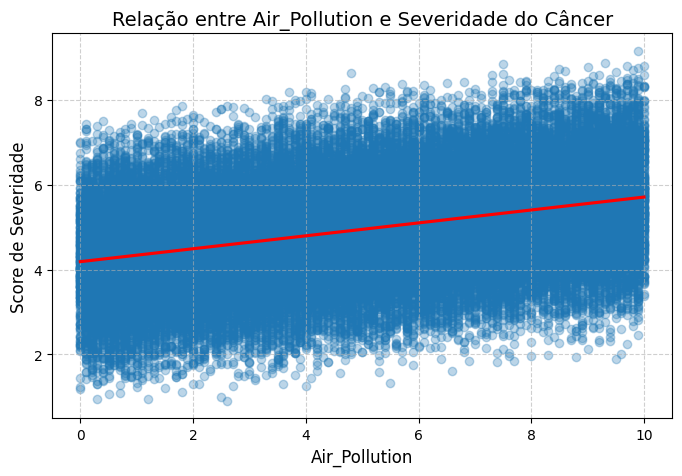

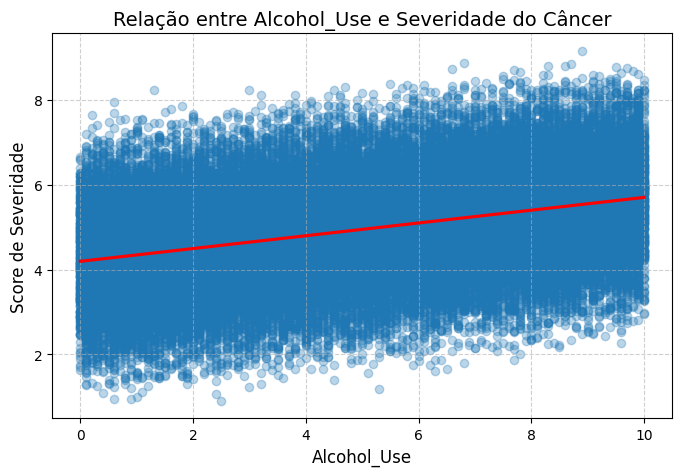

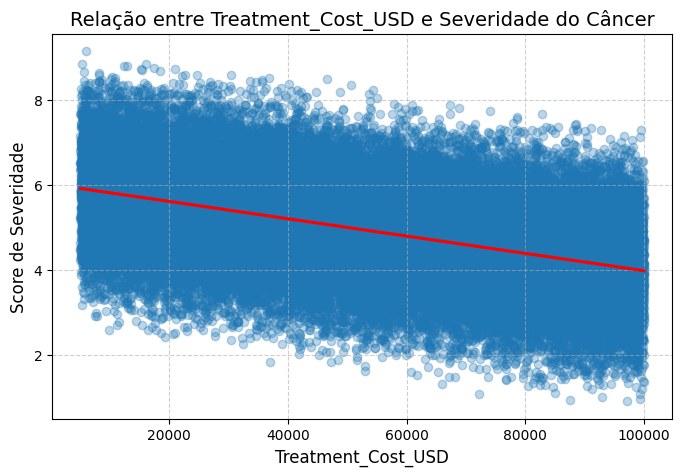

In [ ]:
top_numeric_features = ['Smoking', 'Genetic_Risk', 'Air_Pollution','Alcohol_Use', 'Treatment_Cost_USD']

for feature in top_numeric_features:
    plt.figure(figsize=(8, 5))
    sns.regplot(x=feature, y='Target_Severity_Score', data=df,
                scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    plt.title(f'Relação entre {feature} e Severidade do Câncer', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Score de Severidade', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


## **3. Definir features e target**


Nesta etapa vamos:
1. Identificar quais colunas serão usadas como **variáveis independentes** (features), separando em numéricas e categóricas.  
2. Definir qual coluna será nossa **variável dependente** (target).  
3. Criar os objetos `X` e `y` para treino e teste.

In [ ]:
numeric = [
    'Age', 'Year', 'Genetic_Risk', 'Air_Pollution',
    'Alcohol_Use', 'Smoking', 'Obesity_Level',
    'Treatment_Cost_USD', 'Survival_Years'
]
categorical = [
    'Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage'
]
target = 'Target_Severity_Score'

#separa x e y
X = df[numeric + categorical]
y = df[target]


## **4. Matriz de Correlação**

1. Converter as colunas categóricas em valores numéricos (Label Encoding) para que possamos calcular correlações.  
2. Remover colunas irrelevantes (como `Patient_ID`).  
3. Gerar o **Mapa de Calor da Correlação** entre todas as variáveis numéricas — tanto originais quanto codificadas.  
4. Interpretar rapidamente quais pares de variáveis apresentam maior associação linear.

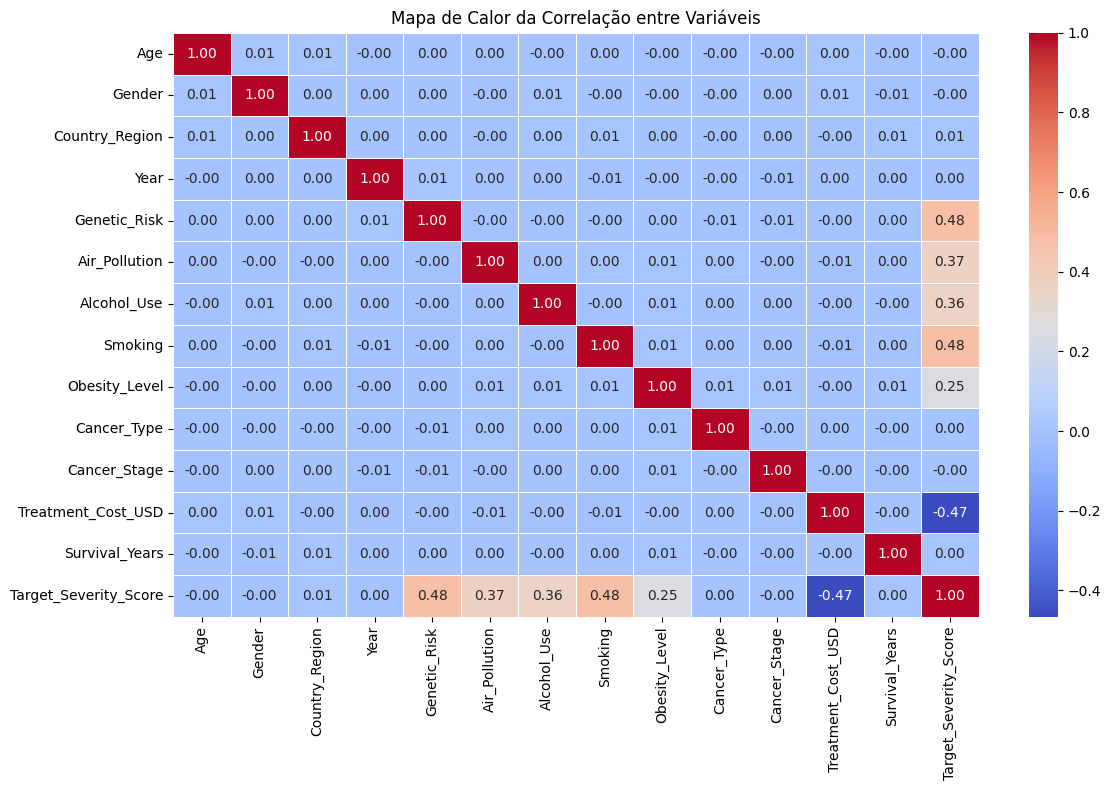

In [ ]:
df_encoded = df.copy()
le = LabelEncoder()
for col in ['Cancer_Type', 'Cancer_Stage', 'Gender', 'Country_Region']:
    df_encoded[col] = le.fit_transform(df_encoded[col])

if 'Patient_ID' in df_encoded.columns:
    df_encoded = df_encoded.drop(columns=['Patient_ID'])

correlation_matrix = df_encoded.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Mapa de Calor da Correlação entre Variáveis')
plt.tight_layout()
plt.show()


In [ ]:
corr_target = df[numeric + [target]].corr()[target].sort_values(ascending=False)
print(corr_target)


Target_Severity_Score    1.000000
Smoking                  0.484420
Genetic_Risk             0.478700
Air_Pollution            0.366963
Alcohol_Use              0.363250
Obesity_Level            0.251366
Survival_Years           0.004161
Year                     0.002109
Age                     -0.001481
Treatment_Cost_USD      -0.466058
Name: Target_Severity_Score, dtype: float64


## **5. Estratégias de Pré-Processamento e Escalonamento**



Treinamos a Árvore de Decisão e calculamos **MSE, MAE e R²**
no conjunto de teste, de modo a verificar qual pré-processamento
gera melhor desempenho para o nosso modelo.

In [ ]:
num_pipe = Pipeline([('scale', StandardScaler())])
cat_pipe = Pipeline([('ohe', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer([
    ('num', num_pipe, numeric),
    ('cat', cat_pipe, ['Gender','Country_Region','Cancer_Type','Cancer_Stage'])
])

In [ ]:
X = df.drop(columns='Target_Severity_Score')
y = df['Target_Severity_Score']
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2,random_state=42)

model_configs = {
    'Tree': {
        'estimator': DecisionTreeRegressor(random_state=42),
        'params': {
            'model__max_depth':[None,10,20],
            'model__min_samples_leaf':[1,2,4]
        }
    },
     'Forest': {
         'estimator': RandomForestRegressor(random_state=42),
         'params': {
             'model__n_estimators':[100,200],
             'model__max_depth':[None,10],
             'model__min_samples_leaf':[1,2]
         }
     },
    'SVR': {
        'estimator': SVR(),
        'params': {
            'model__C':[0.1,1,10],
            'model__gamma':['scale','auto'],
            'model__kernel':['rbf','linear']
        }
    },
    'MLP': {
        'estimator': MLPRegressor(random_state=42, max_iter=1000),
        'params': {
            'model__hidden_layer_sizes':[(50,),(100,),(50,30)],
            'model__activation':['relu','tanh'],
            'model__alpha':[1e-4,1e-3]
        }
    }
}

kf = KFold(n_splits=5,shuffle=True,random_state=42)
results = []
best_model = None
best_score = -np.inf

for name, cfg in model_configs.items():
    pipe = Pipeline([('prep', preprocessor), ('model', cfg['estimator'])])

    grid = GridSearchCV(pipe, cfg['params'], cv=kf,
                        scoring='r2', n_jobs=-1, verbose=1)
    print(f"\n>> Treinando {name}")
    grid.fit(X_tr, y_tr)
    test_r2 = grid.score(X_te, y_te)
    results.append({
        'Model': name,
        'CV_R2': grid.best_score_,
        'Best_Params': grid.best_params_,
        'Test_R2': test_r2
    })
    # se for o novo melhor, armazena
    if test_r2 > best_score:
        best_score = test_r2
        best_model = grid.best_estimator_

# exibe comparação
res_df = pd.DataFrame(results).sort_values('Test_R2', ascending=False)
display(res_df)


>> Treinando Tree
Fitting 5 folds for each of 9 candidates, totalling 45 fits

>> Treinando Forest
Fitting 5 folds for each of 8 candidates, totalling 40 fits

>> Treinando SVR
Fitting 5 folds for each of 12 candidates, totalling 60 fits

>> Treinando MLP
Fitting 5 folds for each of 12 candidates, totalling 60 fits


,Model,CV_R2,Best_Params,Test_R2
3,MLP,0.999881,"{'model__activation': 'relu', 'model__alpha': ...",0.999932
2,SVR,0.999181,"{'model__C': 1, 'model__gamma': 'scale', 'mode...",0.999209
1,Forest,0.977828,"{'model__max_depth': None, 'model__min_samples...",0.979481
0,Tree,0.914396,"{'model__max_depth': None, 'model__min_samples...",0.919324


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['CV_R2'].plot(kind='hist', bins=20, title='CV_R2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Test_R2'].plot(kind='hist', bins=20, title='Test_R2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='CV_R2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='CV_R2', y='Test_R2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['CV_R2'].plot(kind='line', figsize=(8, 4), title='CV_R2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Test_R2'].plot(kind='line', figsize=(8, 4), title='Test_R2')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='index', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='CV_R2', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='Test_R2', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## **6. Seleção de features numéricas com Permutation Importance**



Top-5 fatores condicionantes segundo o MLP:
 Genetic_Risk          0.471399
Smoking               0.467391
Treatment_Cost_USD    0.430187
Air_Pollution         0.268383
Alcohol_Use           0.260005
dtype: float64


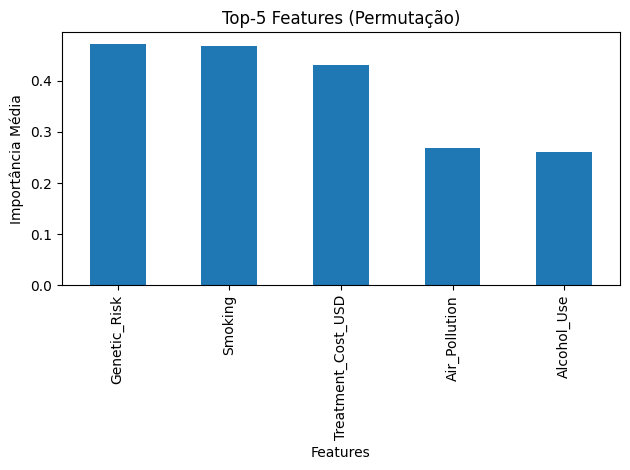

In [ ]:
perm = permutation_importance(
    best_model, X_te, y_te,
    n_repeats=10, random_state=42, n_jobs=-1
)

feat_names = X_te.columns
imp_series = (
    pd.Series(perm.importances_mean, index=feat_names)
      .sort_values(ascending=False)
)

print("Top-5 fatores condicionantes segundo o MLP:\n", imp_series.head(5))
plt.figure()
imp_series.head(5).plot.bar()
plt.title("Top-5 Features (Permutação)")
plt.xlabel("Features")
plt.ylabel("Importância Média")
plt.tight_layout()
plt.show()
